<a href="https://colab.research.google.com/github/MohammadDeep/pian-files/blob/main/preproses_signal_Eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
number_persoin = 34

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
list_columns = ['Seconds',
            'Bvp',
            'Eda_E4',
            'Tmp',
            'Ibi',
            'Hr',
            'Resp',
            'Eda_RB',
            'Ecg',
            'Emg',
            'Heater [C]',
            'COVAS',
            'Heater_cleaned']

In [ ]:
import pandas as pd
def read_csv_file(number = 1):
    PATH_FILE = '/content/drive/MyDrive/dataset/PainMoint/extracted_files/PMED/PMHDB/raw-data/'


    list_columns = ['Seconds',
                'Bvp',
                'Eda_E4',
                'Tmp',
                'Ibi',
                'Hr',
                'Resp',
                'Eda_RB',
                'Ecg',
                'Emg',
                'Heater [C]',
                'COVAS',
                'Heater_cleaned']



    number = str(number).zfill(2)

    file_path = PATH_FILE + 'S_' + number + '-synchronised-data.csv'
    df = pd.read_csv(file_path, sep=';', skipinitialspace=True, engine='python', on_bad_lines='skip')





    for i1 in list_columns:
      df[i1] = df[i1].str.replace(',', '.').astype(float)
    return df
df = read_csv_file(number_persoin)
df.head()

,Seconds,Bvp,Eda_E4,Tmp,Ibi,Hr,Resp,Eda_RB,Ecg,Emg,Heater [C],COVAS,Heater_cleaned
0,0.000,-11.531258,3.720803,30.63,0.870211,68.960729,-0.048828,6.735611,-0.053375,-0.002838,32.270,0.0,32.0
1,0.004,-12.130492,3.720803,30.63,0.870353,68.949185,-0.155640,6.731923,-0.055069,-0.003326,32.396,0.0,32.0
2,0.008,-12.729726,3.720803,30.63,0.870495,68.937642,-0.163269,6.734848,-0.033188,0.001373,32.522,0.0,32.0
3,0.012,-13.328960,3.720803,30.63,0.870637,68.926099,-0.110881,6.729889,-0.035248,0.002121,32.648,0.0,32.0
4,0.016,-13.681376,3.720861,30.63,0.870779,68.914555,-0.058492,6.724930,-0.037308,0.002869,32.774,0.0,32.0


In [ ]:



def delet_nan(df):
  non_d = df.isna().sum()
  print(f'numebr of nan data : {non_d}')
  df = df.dropna()
  return df
#df = delet_nan(df)


In [ ]:
eda_list = ['Eda_E4','Eda_RB']


In [ ]:
def data_d(data):
  new_data = []
  for i in range(len(data)-1):
    new_data.append(data[i+1]-data[i])
  return new_data

In [ ]:
eda_d = []
for i in eda_list:
  eda_d.append(data_d(df[i].tolist()))

In [ ]:
eda_dd = []
for i in eda_d:
  eda_dd.append(data_d(i))

In [ ]:
len(eda_dd)

2

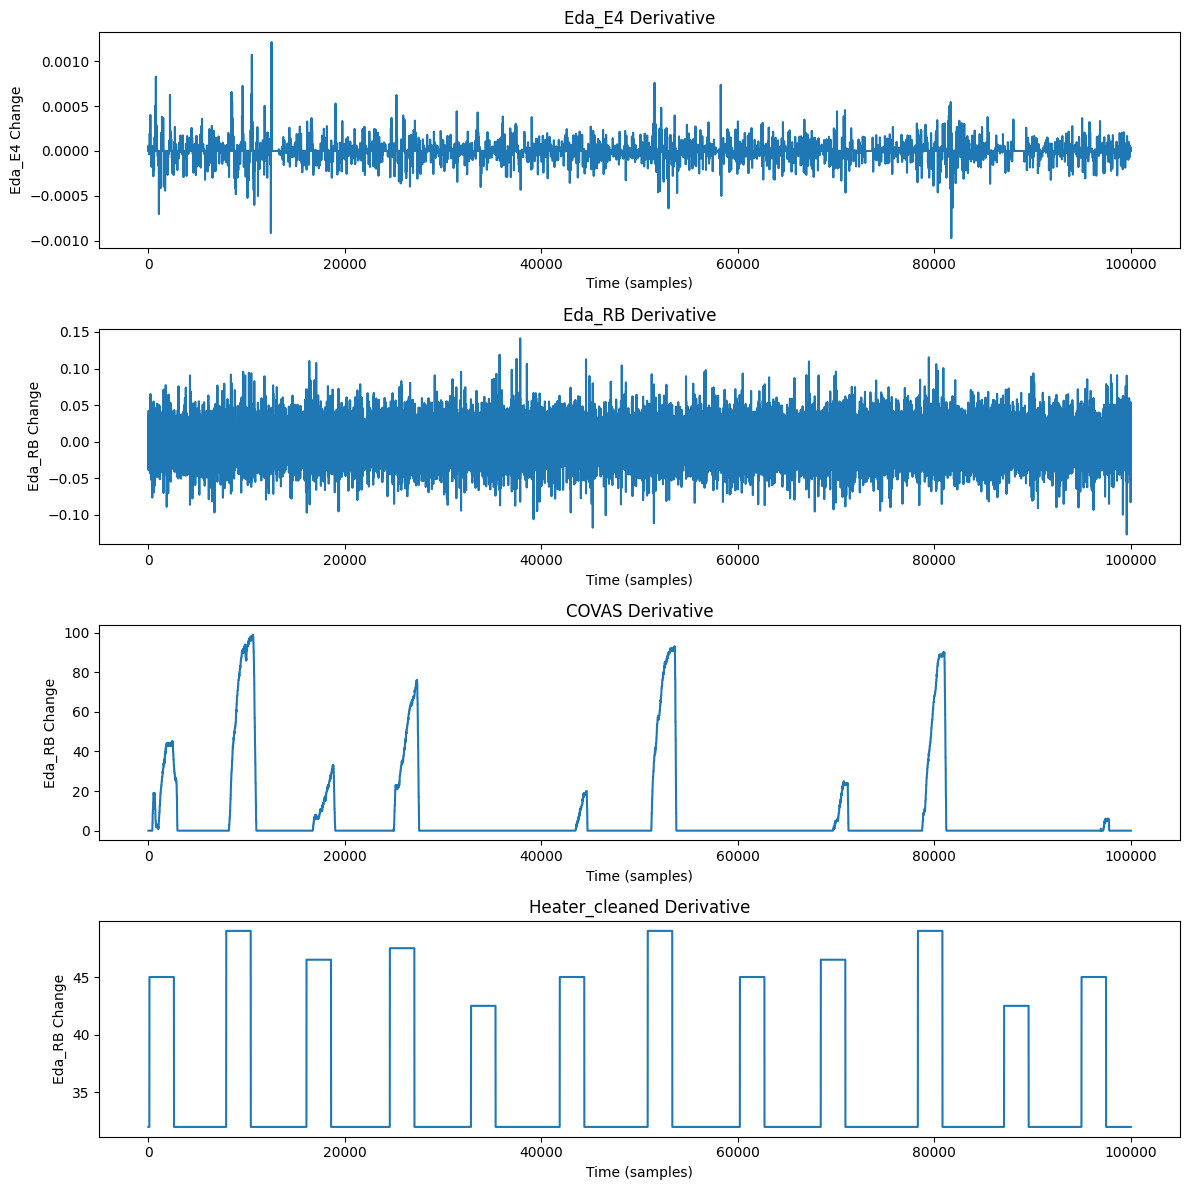

In [ ]:
# prompt: plot eda_d

import matplotlib.pyplot as plt

# Assuming eda_d is a list containing two lists (Eda_E4 and Eda_RB)
# You can plot each list separately or combine them into a single plot

plt.figure(figsize=(12, 12))

# Plot Eda_E4
plt.subplot(4, 1, 1)
plt.plot(eda_dd[0][:100000])
plt.title('Eda_E4 Derivative')
plt.xlabel('Time (samples)')
plt.ylabel('Eda_E4 Change')

# Plot Eda_RB
plt.subplot(4, 1, 2)
plt.plot(eda_dd[1][:100000])
plt.title('Eda_RB Derivative')
plt.xlabel('Time (samples)')
plt.ylabel('Eda_RB Change')


plt.subplot(4, 1, 3)
plt.plot(df['COVAS'][:100000])
plt.title('COVAS Derivative')
plt.xlabel('Time (samples)')
plt.ylabel('Eda_RB Change')



plt.subplot(4, 1, 4)
plt.plot(df['Heater_cleaned'][:100000])
plt.title('Heater_cleaned Derivative')
plt.xlabel('Time (samples)')
plt.ylabel('Eda_RB Change')
plt.tight_layout()
plt.show()


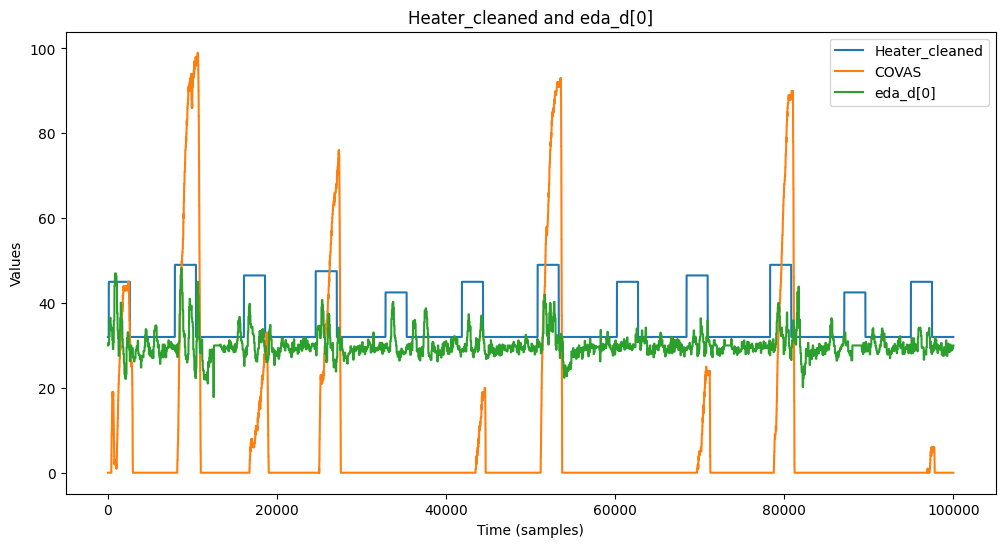

In [ ]:
# prompt: plot df['Heater_cleaned'][:100000] and eda_d[0][:100000]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(df['Heater_cleaned'][:100000], label='Heater_cleaned')
plt.plot(df['COVAS'][:100000], label='COVAS')
eda = []
for i in eda_d[0][:100000]:
  eda.append(i*10000 + 30)
plt.plot(eda , label='eda_d[0]')

plt.title('Heater_cleaned and eda_d[0]')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.signal import decimate

# فرض کنید eda_raw سیگنال شما با نرخ 130 هرتز است
eda_raw = np.array(df['Eda_E4'].tolist())  # فرضاً 10 ثانیه داده (130×10)

# نسبت کاهش نرخ (از 130 به 4 هرتز) = 130/4 = 32.5
# از آنجا که 32.5 عدد صحیح نیست، ابتدا به یک نرخ واسط ساده‌تر تبدیل می‌کنیم:
# ابتدا به 26 هرتز (factor=5)، سپس به 4 هرتز (factor=6.5≈6) می‌رویم.
eda_downsampled_4_1666Hz = decimate(eda_raw, 62, ftype='fir') # 130→26Hz
#eda_downsampled_4_1666Hz = decimate(eda_downsampled_26Hz, 62, ftype='fir') # 26→4Hz

print(len(eda_downsampled_4_1666Hz))


5726


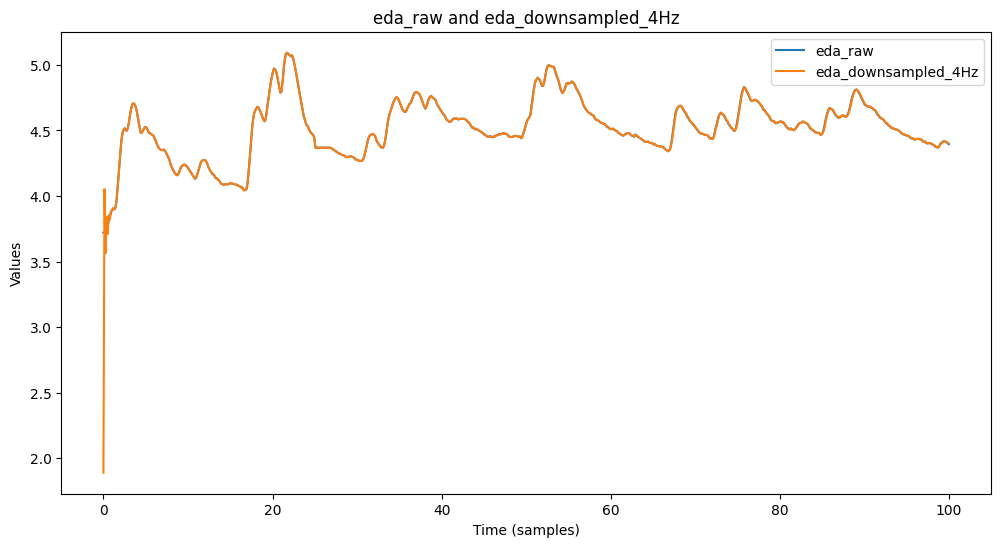

In [ ]:
# prompt: plot eda_raw and eda_downsampled_4Hz
# in twe plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
len_plot = 50000
t = np.linspace(0, 100, len_plot, endpoint=False)
plt.plot(t, eda_raw[:len_plot], label='eda_raw')
t1 = np.linspace(0, 100, int(len_plot//62), endpoint=False)
plt.plot(t1, eda_downsampled_4_1666Hz[:int(len_plot//62)], label='eda_downsampled_4Hz', alpha=1)

plt.title('eda_raw and eda_downsampled_4Hz')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()



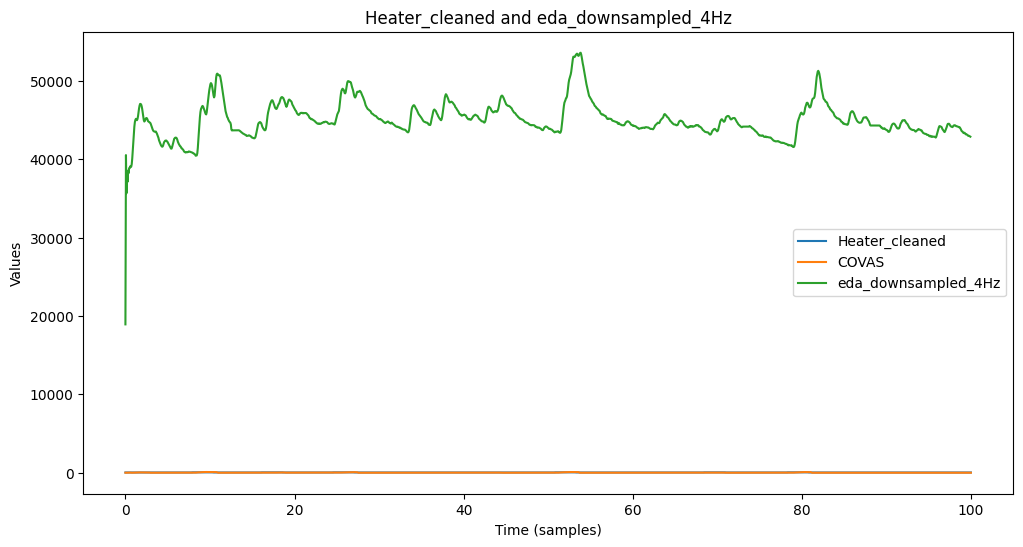

In [ ]:
# prompt: plot df['Heater_cleaned'][:100000] and eda_d[0][:100000]
len_plot = 100000
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
t = np.linspace(0, 100, len_plot, endpoint=False)
plt.plot(t,df['Heater_cleaned'][:len_plot], label='Heater_cleaned')
plt.plot(t, df['COVAS'][:len_plot], label='COVAS')
eda = []
t1 = np.linspace(0, 100, int(100000//62), endpoint=False)
for i in eda_downsampled_4_1666Hz[:int(100000//62)]:
  eda.append(i*10000 + 30)
plt.plot(t1, eda , label='eda_downsampled_4Hz')

plt.title('Heater_cleaned and eda_downsampled_4Hz')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()




In [ ]:
from scipy.signal import medfilt
signal_filtered = medfilt(eda_downsampled_4_1666Hz, kernel_size=3)

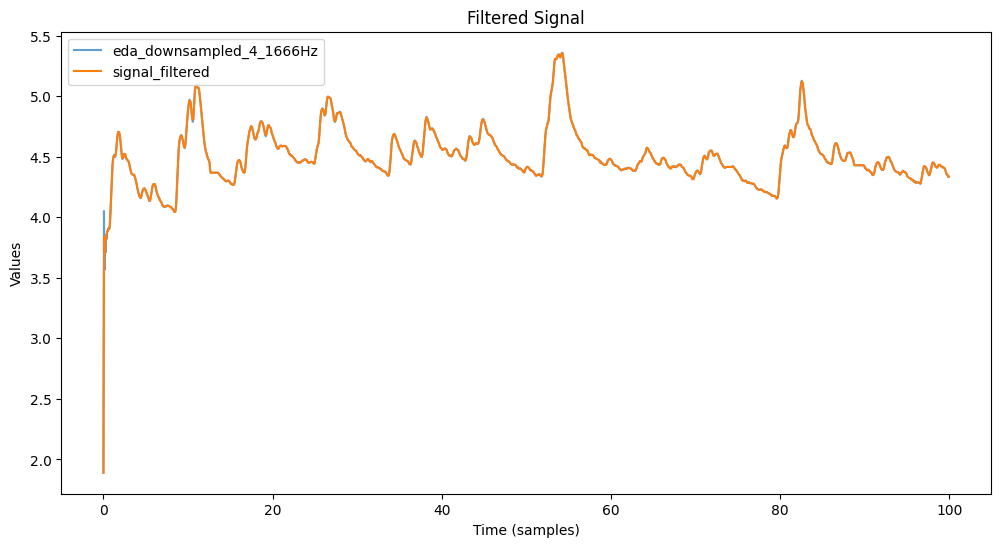

In [ ]:
# prompt: plot signal_filtered
len_plot = 1600
t = np.linspace(0, 100, len_plot, endpoint=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(t,eda_downsampled_4_1666Hz[:len_plot], label='eda_downsampled_4_1666Hz', alpha=0.7)
plt.plot(t,signal_filtered[:len_plot], label='signal_filtered')

plt.title('Filtered Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
eda_downsampled_2Hz = decimate(signal_filtered, 2, ftype='fir')

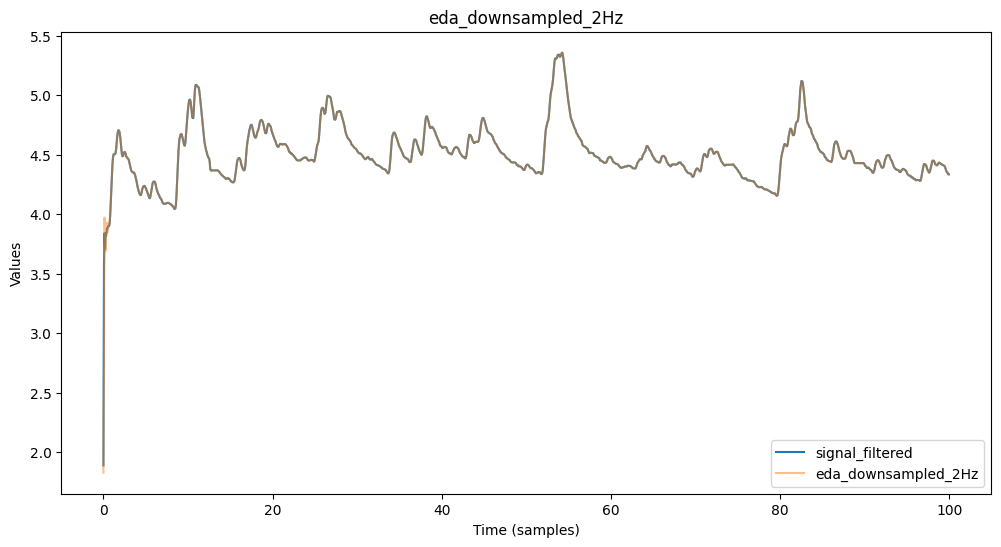

In [ ]:
# prompt: plot eda_downsampled_2Hz
len_plot = 1600
t = np.linspace(0, 100, len_plot, endpoint=False)
t1 = np.linspace(0, 100, int(len_plot//2), endpoint=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(t,signal_filtered[:len_plot], label='signal_filtered')
plt.plot(t1, eda_downsampled_2Hz[:int(len_plot//2)], label='eda_downsampled_2Hz',  alpha=0.5)
plt.title('eda_downsampled_2Hz')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()


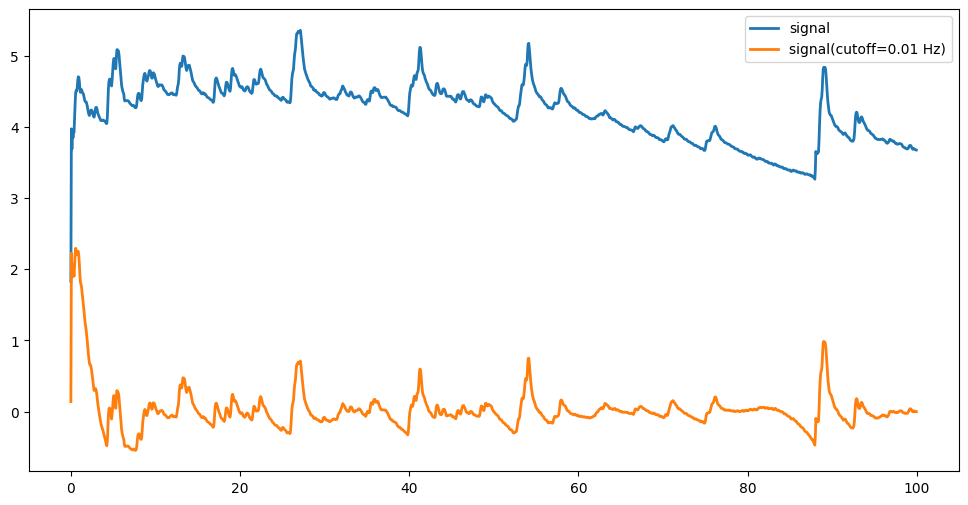

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# فرض کنید یک سیگنال نمونه تولید می‌کنیم (مثلاً با نویز DC و فرکانس‌های پایین)
fs = 2  # نرخ نمونه‌برداری به هرتز
len_plot = 1600
t = np.linspace(0, 100, len_plot, endpoint=False)  # 100 ثانیه سیگنال
# تولید یک سیگنال شامل مؤلفه DC، فرکانس‌های پایین و یک موج اصلی

signal = eda_downsampled_2Hz
# طراحی فیلتر بالاگذر Butterworth
cutoff = 0.01  # فرکانس قطع به هرتز
order = 4      # مرتبه فیلتر
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist  # نرمال‌سازی فرکانس قطع

# طراحی ضرایب فیلتر
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# اعمال فیلتر به سیگنال با استفاده از filtfilt برای جلوگیری از تأخیر فازی
signal_filtered = filtfilt(b, a, signal)

# رسم نمودار سیگنال اصلی و فیلتر شده
plt.figure(figsize=(12, 6))
plt.plot( t, signal[:len_plot], label='signal',linewidth=2)
plt.plot(t,signal_filtered[:len_plot], label='signal(cutoff=0.01 Hz)', linewidth=2)
#plt.xlabel('زمان (ثانیه)')
#plt.ylabel('دامنه')
#plt.title('اعمال فیلتر بالاگذر بر روی سیگنال')
plt.legend()
#plt.grid(True)
plt.show()


In [ ]:
len(signal_filtered)

2863

In [ ]:
!git clone https://github.com/lciti/cvxEDA.git

fatal: destination path 'cvxEDA' already exists and is not an empty directory.


In [ ]:
%cd /content/cvxEDA/src

/content/cvxEDA/src


In [ ]:
!python cvxEDA.py install

     pcost       dcost       gap    pres   dres
 0: -1.3674e+03 -1.3134e+03  1e+04  1e+02  1e+00
 1: -1.3967e+03 -3.3279e+03  2e+03  2e+01  2e-01
 2: -1.4066e+03 -3.3242e+03  2e+03  2e+01  2e-01
 3: -1.4175e+03 -1.8111e+03  4e+02  3e+00  3e-02
 4: -1.4193e+03 -1.5188e+03  1e+02  6e-01  6e-03
 5: -1.4198e+03 -1.4577e+03  4e+01  2e-01  2e-03
 6: -1.4202e+03 -1.4295e+03  9e+00  2e-02  3e-04
 7: -1.4230e+03 -1.4262e+03  3e+00  8e-03  9e-05
 8: -1.4237e+03 -1.4255e+03  2e+00  1e-03  1e-05
 9: -1.4248e+03 -1.4253e+03  5e-01  3e-04  3e-06
10: -1.4250e+03 -1.4252e+03  2e-01  6e-05  6e-07
11: -1.4251e+03 -1.4251e+03  4e-02  1e-05  1e-07
12: -1.4251e+03 -1.4251e+03  1e-02  2e-06  2e-08
13: -1.4251e+03 -1.4251e+03  2e-03  3e-07  3e-09
14: -1.4251e+03 -1.4251e+03  3e-04  2e-08  2e-10
15: -1.4251e+03 -1.4251e+03  3e-05  2e-09  2e-11
16: -1.4251e+03 -1.4251e+03  1e-06  7e-11  8e-13
Optimal solution found.


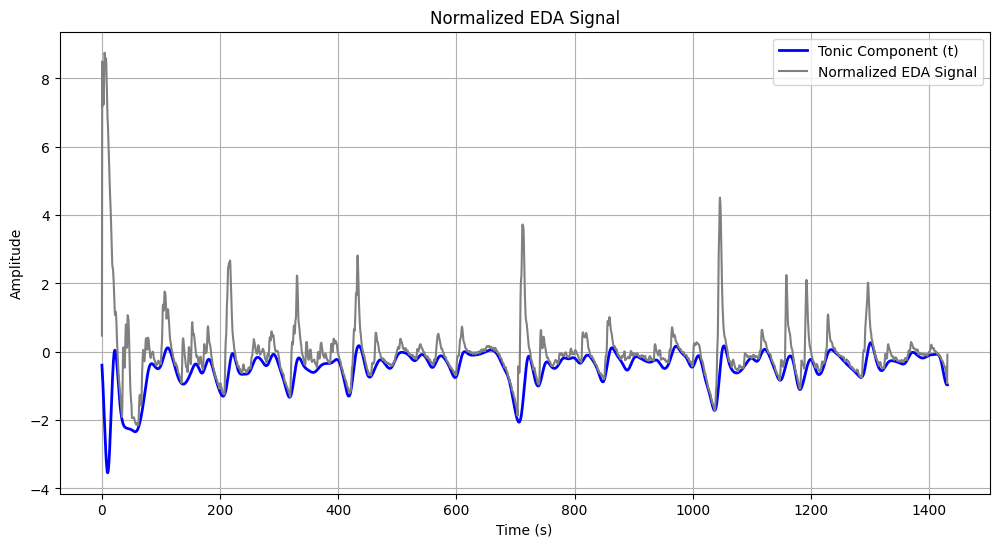

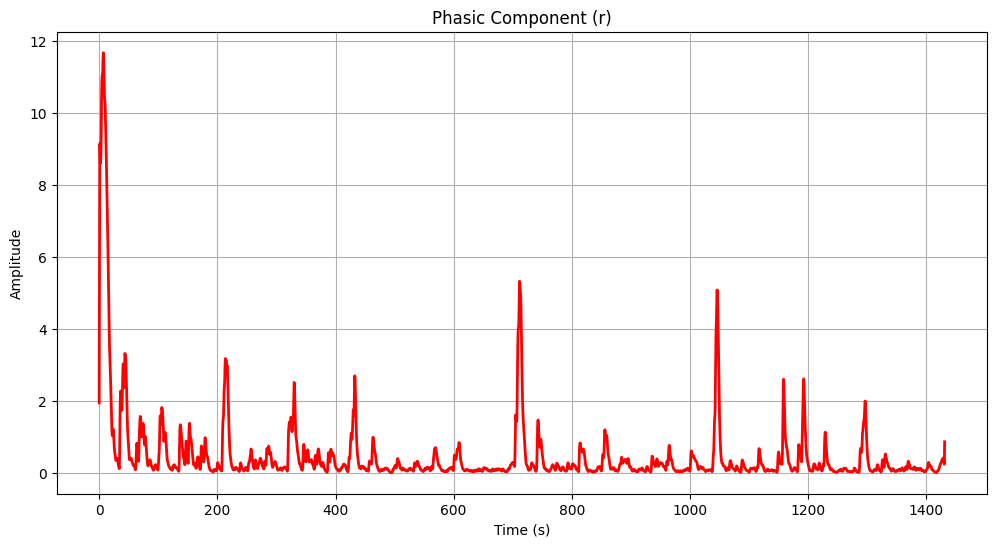

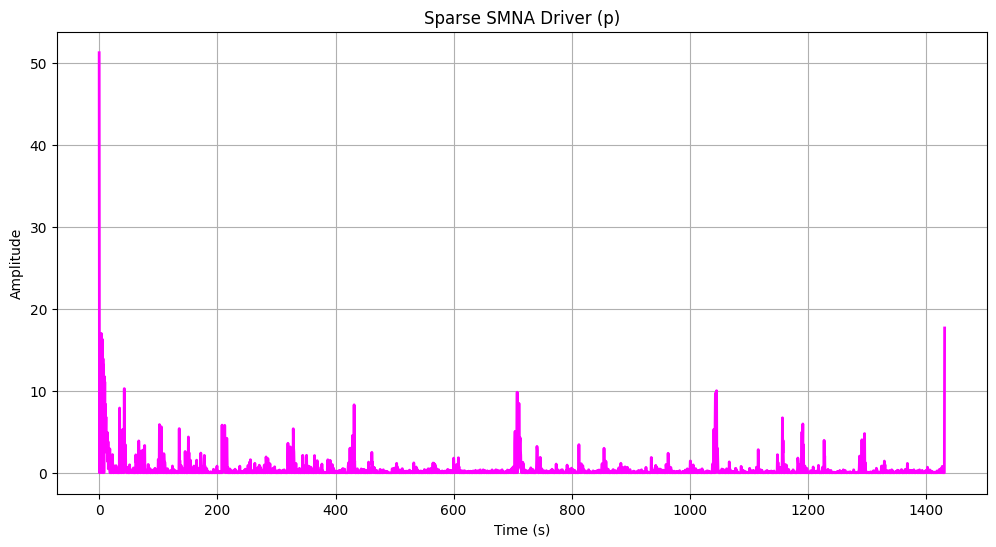

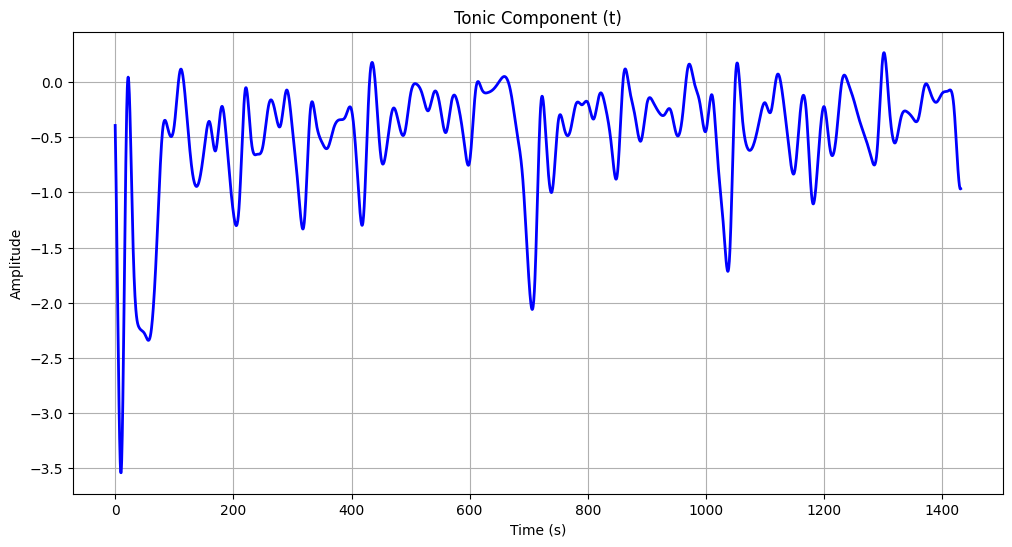

In [ ]:

import cvxEDA
import numpy as np
import matplotlib.pyplot as plt

# فرض کنید y یک بردار numpy حاوی سیگنال EDA ضبط‌شده با نرخ نمونه‌برداری 2 هرتز است.
# در اینجا فرض بر این است که متغیر signal_filtered از قبل تعریف شده و شامل سیگنال EDA است.
y = signal_filtered
Fs = 2.0                   # نرخ نمونه‌برداری 2 هرتز
n_samples = len(y)
time = np.arange(n_samples) / Fs

# استانداردسازی سیگنال (z-score normalization)
yn = (y - np.mean(y)) / np.std(y)

# اجرای cvxEDA؛ توجه کنید که ورودی delta برابر با 1./Fs می‌باشد.
[r, p, t_est, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1.0 / Fs)

# رسم نمودار سیگنال EDA نرمال‌شده در یک شکل جداگانه
plt.figure(figsize=(12, 6))
plt.plot(time, t_est, color='blue', linewidth=2,label = 'Tonic Component (t)')
plt.plot(time, yn, color='gray',label = 'Normalized EDA Signal')
plt.title("Normalized EDA Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
# رسم نمودار مؤلفه فازیک
plt.figure(figsize=(12, 6))
plt.plot(time, r, color='red', linewidth=2)
plt.title("Phasic Component (r)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# رسم نمودار راننده فازیک (Sparse SMNA driver)
plt.figure(figsize=(12, 6))
plt.plot(time, p, color='magenta', linewidth=2)
plt.title("Sparse SMNA Driver (p)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# رسم نمودار مؤلفه تونیک
plt.figure(figsize=(12, 6))
plt.plot(time, t_est, color='blue', linewidth=2)
plt.title("Tonic Component (t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.show()


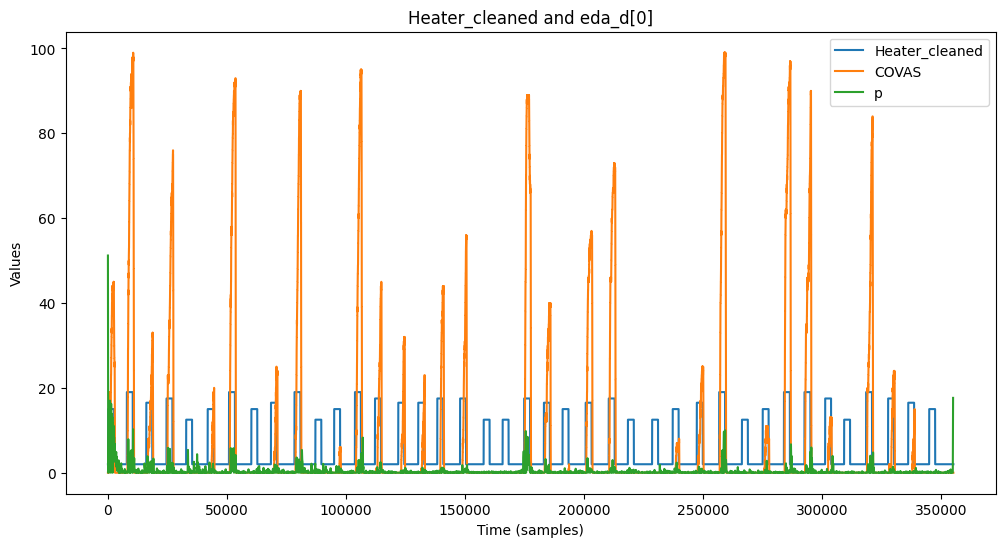

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
len_number_plot = len(df['Heater_cleaned'])
t_p = np.linspace(0, len_number_plot, len_number_plot, endpoint=False)
n = int((len(p)/len(df['COVAS'])) * len_number_plot)
t = np.linspace(0, len_number_plot, n, endpoint=False)
df_heater = np.array(df['Heater_cleaned'][:len_number_plot])- 30
plt.plot(t_p,df_heater , label='Heater_cleaned')
plt.plot(t_p,df['COVAS'][:len_number_plot], label='COVAS')


plt.plot(t, p[:n], label='p')

plt.title('Heater_cleaned and eda_d[0]')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
def dphEDA(signal = r , fs = 2, padding = 2):
  len_signal = len(signal)
  new_data = []
  for i in range(2,len_signal-2):
    n = (-signal[i-2] - 8 * signal[i-1] + 8 * signal[i+1] + signal[i+2])/(12 * (1/fs))
    new_data.append(n)
  for i in range(padding):
    new_data.insert(0,0)
    new_data.append(0)
  return new_data
dphEDA_r = dphEDA(r)

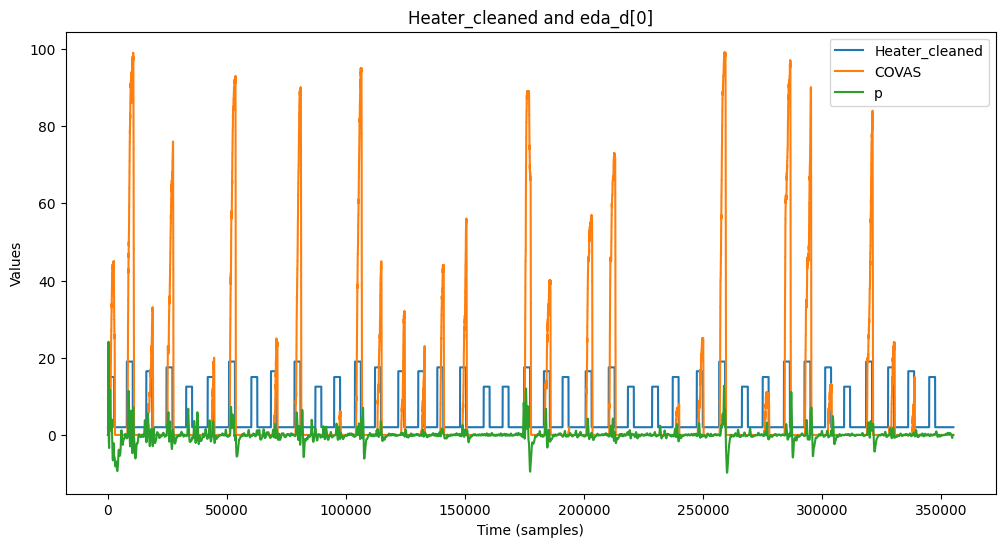

In [ ]:
plt.figure(figsize=(12, 6))
len_number_plot = len(df['Heater_cleaned'])
t_p = np.linspace(0, len_number_plot, len_number_plot, endpoint=False)
n = int((len(p)/len(df['COVAS'])) * len_number_plot)
t = np.linspace(0, len_number_plot, n, endpoint=False)
df_heater = np.array(df['Heater_cleaned'][:len_number_plot])- 30
plt.plot(t_p,df_heater , label='Heater_cleaned')
plt.plot(t_p,df['COVAS'][:len_number_plot], label='COVAS')

ndata = np.array(dphEDA_r[:n]) *  5
plt.plot(t, ndata, label='p')

plt.title('Heater_cleaned and eda_d[0]')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()

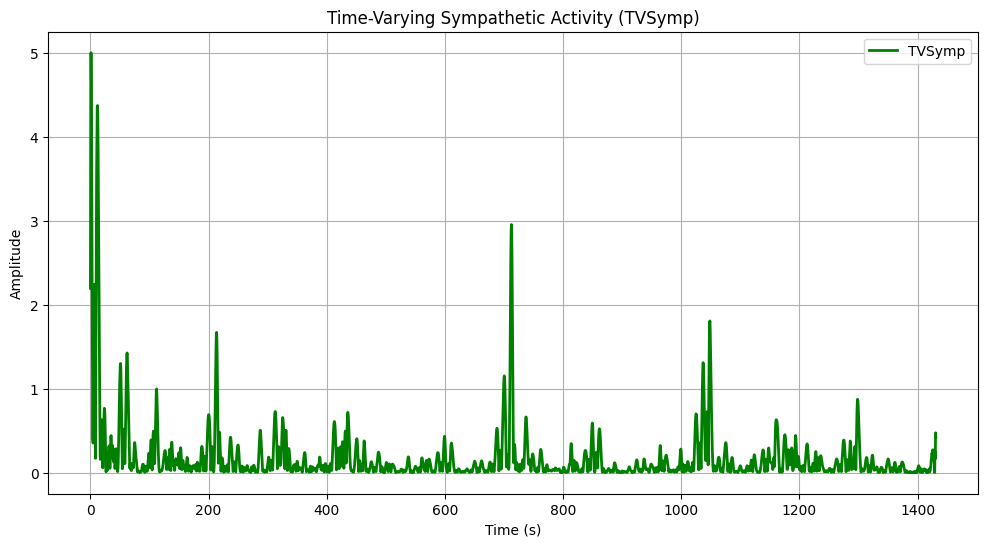

In [ ]:
import numpy as np
from scipy.signal import butter, filtfilt, hilbert

def compute_TVSymp(eda_signal, Fs):
    """
    محاسبه شاخص فعالیت سمپاتیک طیفی-زمانی (TVSymp) از سیگنال EDA با استفاده از VFCDM.

    ورودی‌ها:
       eda_signal: سیگنال EDA پیش‌پردازش‌شده (مثلاً پس از فیلتر کردن و بازنمونه‌برداری)
       Fs: نرخ نمونه‌برداری سیگنال به هرتز

    خروجی:
       TVSymp: شاخص فعالیت سمپاتیک طیفی-زمانی (دامنه لحظه‌ای سیگنال ترکیبی)
    """
    # تعیین باند فرکانسی هدف: 0.08 تا 0.24 هرتز
    freq_band = [0.08, 0.24]
    # انتخاب چند بسامد مرکزی به‌عنوان نمونه (برای مثال، 3 بسامد در این بازه)
    center_freqs = np.linspace(freq_band[0], freq_band[1], 3)

    # ایجاد بردار زمان برای سیگنال
    t = np.arange(len(eda_signal)) / Fs

    # طراحی فیلتر پایین‌گذر (Butterworth)
    # پس از دمودولاسیون، سیگنال به مرکز فرکانسی صفر منتقل می‌شود؛ بنابراین نیاز به فیلتر پایین‌گذر داریم.
    # انتخاب یک فرکانس قطع نسبتاً پایین، مثلاً 0.5 هرتز.
    cutoff = 0.5  # هرتز
    order = 4
    nyquist = 0.5 * Fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)

    # جمع‌بندی مؤلفه‌های بازسازی‌شده در باند هدف
    combined = np.zeros(len(eda_signal), dtype=complex)

    for f0 in center_freqs:
        # دمودولاسیون: ضرب سیگنال در exp(-j 2π f0 t)
        demodulated = eda_signal * np.exp(-1j * 2 * np.pi * f0 * t)
        # اعمال فیلتر پایین‌گذر برای حذف مؤلفه‌های ناخواسته
        filtered = filtfilt(b, a, demodulated)
        # جمع کردن خروجی‌ها
        combined += filtered

    # محاسبه تبدیل هیلبرت (برای استخراج دامنه لحظه‌ای)
    analytic_signal = hilbert(np.real(combined))
    TVSymp = np.abs(analytic_signal)

    return TVSymp

# مثال استفاده:
# فرض کنید eda_signal یک آرایه numpy از سیگنال EDA پیش‌پردازش‌شده است و Fs نرخ نمونه‌برداری آن (مثلاً 2 هرتز) می‌باشد.
# TVSymp = compute_TVSymp(eda_signal, Fs)

# برای رسم نمودار:
import matplotlib.pyplot as plt

# فرض کنید eda_signal و Fs تعریف شده‌اند.
TVSymp = compute_TVSymp(signal_filtered , 2)
t = np.arange(len(signal_filtered  )) / Fs

plt.figure(figsize=(12, 6))
plt.plot(t, TVSymp, color='green', linewidth=2, label='TVSymp')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Varying Sympathetic Activity (TVSymp)')
plt.legend()
plt.grid(True)
plt.show()


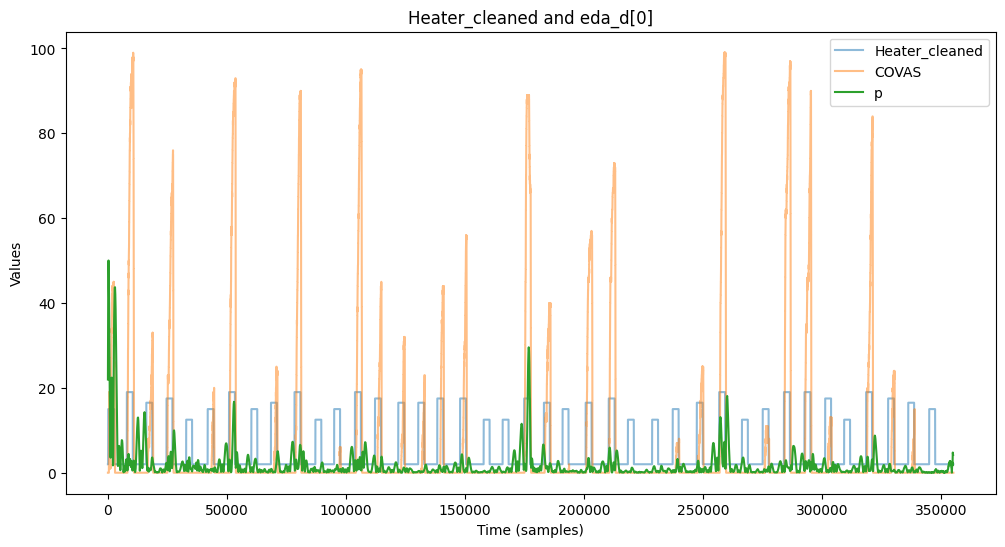

In [ ]:
plt.figure(figsize=(12, 6))
len_number_plot = len(df['Heater_cleaned'])
t_p = np.linspace(0, len_number_plot, len_number_plot, endpoint=False)
n = int((len(p)/len(df['COVAS'])) * len_number_plot)
t = np.linspace(0, len_number_plot, n, endpoint=False)
df_heater = np.array(df['Heater_cleaned'][:len_number_plot])- 30
plt.plot(t_p,df_heater , label='Heater_cleaned',  alpha=0.5)
plt.plot(t_p,df['COVAS'][:len_number_plot], label='COVAS',  alpha=0.5)

ndata = np.array(TVSymp[:n]) *  10
plt.plot(t, ndata, label='p')

plt.title('Heater_cleaned and eda_d[0]')
plt.xlabel('Time (samples)')
plt.ylabel('Values')
plt.legend()
plt.show()